# Algoritmo de clusterização K-Means

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

%matplotlib inline

## Conjunto de dados

Lista com os 50 atletas mais bem pagos do mundo, de acordo com ranking da Forbes.

Atributos:

Name
Total
Salary
Marketing
Sport
Age

Dados coletados em: https://www.forbes.com/athletes/list/#tab:overall


In [22]:
df = pd.read_csv('salaries50.csv', delimiter=';')
df.head(10)

,Name,Total,Salary,Marketing,Sport,Age
0,Aaron Rodgers,30.1,21.1,9.0,Football,36
1,Andres Iniesta,29.6,26.6,3.0,Soccer,36
2,Anthony Davis,30.4,20.4,10.0,Basketball,27
3,Anthony Joshua,47.0,36.0,11.0,Boxing,30
4,Blake Griffin,31.9,25.9,6.0,Basketball,31
5,Canelo Alvarez,37.0,35.0,2.0,Boxing,29
6,Carson Wentz,59.1,55.1,4.0,Football,27
7,Chris Paul,35.0,29.0,6.0,Basketball,35
8,Conor McGregor,48.0,32.0,16.0,Mixed Martial Arts,31
9,Cristiano Ronaldo,105.0,60.0,45.0,Soccer,35


## Ordenado pelo total

In [23]:
df = df.sort_values('Total',ascending=False)
df.head(10)

,Name,Total,Salary,Marketing,Sport,Age
41,Roger Federer,106.3,6.3,100.0,Tennis,38
9,Cristiano Ronaldo,105.0,60.0,45.0,Soccer,35
30,Lionel Messi,104.0,72.0,32.0,Soccer,32
36,Neymar,95.5,70.5,25.0,Soccer,28
28,LeBron James,88.2,28.2,60.0,Basketball,35
46,Stephen Curry,74.4,30.4,44.0,Basketball,32
22,Kevin Durant,63.9,28.9,35.0,Basketball,31
47,Tiger Woods,62.3,2.3,60.0,Golf,44
23,Kirk Cousins,60.5,58.0,2.5,Football,31
6,Carson Wentz,59.1,55.1,4.0,Football,27


## Tipo de registros

In [4]:
df.dtypes

Name          object
Total        float64
Salary       float64
Marketing    float64
Sport         object
Age            int64
dtype: object

## Descrição dos registros

In [24]:
df.describe()

,Total,Salary,Marketing,Age
count,50.000000,50.00000,50.000000,50.000000
mean,47.558000,29.07400,19.482000,31.800000
std,20.702096,16.09161,19.807396,5.252793
min,28.500000,0.80000,0.300000,21.000000
25%,32.875000,22.12500,5.500000,29.000000
50%,40.650000,27.60000,12.500000,31.000000
75%,53.500000,34.50000,30.750000,34.750000
max,106.300000,72.00000,100.000000,50.000000


## Visualização do conjunto de dados

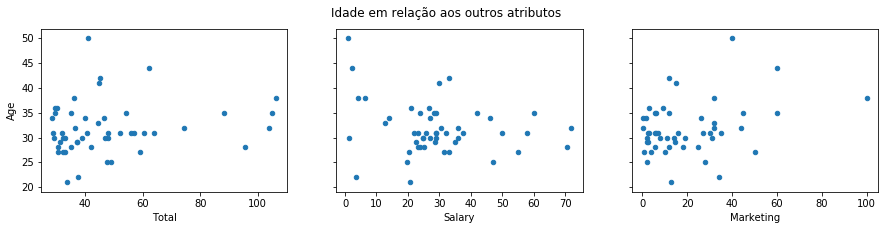

In [25]:
f, axs = plt.subplots(1, 3, sharey=True)
f.suptitle('Idade em relação aos outros atributos')
df.plot(kind='scatter', x='Total', y='Age', ax=axs[0], figsize=(15, 3))
df.plot(kind='scatter', x='Salary', y='Age', ax=axs[1])
df.plot(kind='scatter', x='Marketing', y='Age', ax=axs[2])

## Verificando relação entre Marketing e Idade

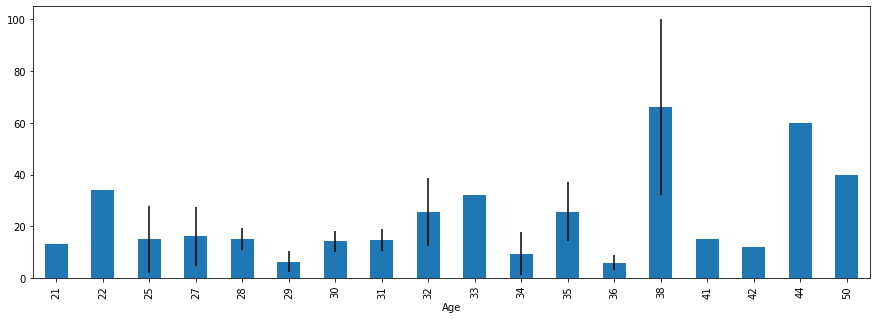

In [26]:
means = df.groupby('Age').mean()['Marketing']
errors = df.groupby('Age').std()['Marketing'] / np.sqrt(df.groupby('Age').count()['Marketing'])
ax = means.plot.bar(yerr=errors,figsize=(15,5))

## Determinando valor de K

No algoritmo de clusterização k-means, uma das abordagens mais utilizadas para determinar o valor de K é chamada método cotovelo (The elbow method). Isso envolve executar o algoritmo várias vezes em um loop, com um número crescente de opções de cluster e, em seguida, plotar a pontuação de cluster em relação ao número de clusters.

Uma plotagem típica se parece com a seguinte:

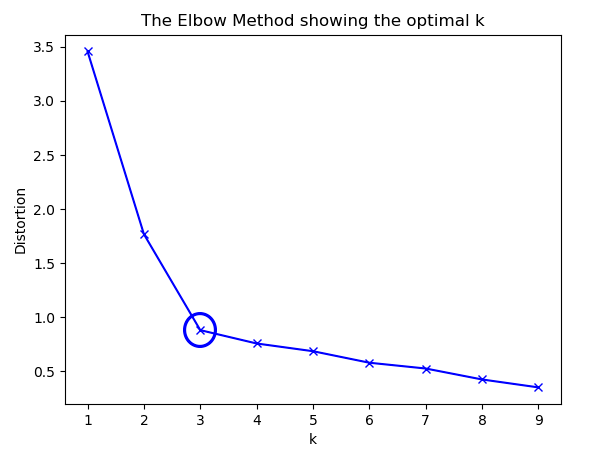

A pontuação é, em geral, uma medida dos dados de entrada na função objetivo de médias k, isto é, a distância intra-cluster em relação à distância interna do cluster.

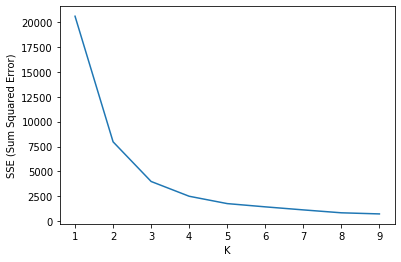

In [8]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Marketing']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('SSE (Sum Squared Error)')
plt.plot(k_rng, sse)

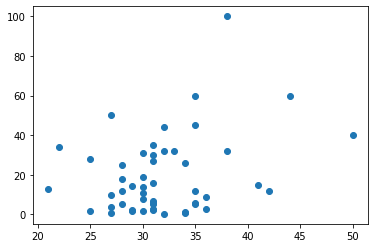

In [9]:
plt.scatter(df['Age'], df['Marketing'])

## Treinando o modelo

In [10]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Age','Marketing']])
df['ypred'] = y_predict
df.head()

,Name,Total,Salary,Marketing,Sport,Age,ypred
41,Roger Federer,106.3,6.3,100.0,Tennis,38,2
9,Cristiano Ronaldo,105.0,60.0,45.0,Soccer,35,0
30,Lionel Messi,104.0,72.0,32.0,Soccer,32,0
36,Neymar,95.5,70.5,25.0,Soccer,28,0
28,LeBron James,88.2,28.2,60.0,Basketball,35,2


## Gerando o gráfico

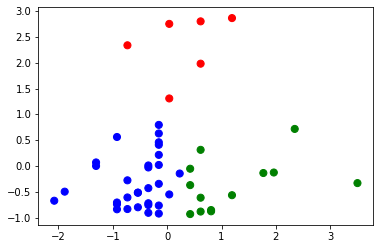

In [17]:
cores = np.array(['green', 'red', 'blue'])
plt.scatter(x=df['Age'], 
            y=df['Marketing'], 
            c=cores[df.ypred], s=50)

## Normalizando os valores

In [18]:
df_scale = df
df_scale['Marketing'] = scale(df_scale.Total)
df_scale['Age'] = scale(df_scale.Age)
df_scale.head()

,Name,Total,Salary,Marketing,Sport,Age,ypred
41,Roger Federer,106.3,6.3,2.866298,Tennis,1.192308,1
9,Cristiano Ronaldo,105.0,60.0,2.802865,Soccer,0.615385,1
30,Lionel Messi,104.0,72.0,2.754070,Soccer,0.038462,1
36,Neymar,95.5,70.5,2.339315,Soccer,-0.730769,1
28,LeBron James,88.2,28.2,1.983114,Basketball,0.615385,1


## Repetindo os passos de Treino e Gerar Gráfico

In [19]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df_scale[['Age','Marketing']])
df_scale['ypred'] = y_predict
df_scale.head()

,Name,Total,Salary,Marketing,Sport,Age,ypred
41,Roger Federer,106.3,6.3,2.866298,Tennis,1.192308,2
9,Cristiano Ronaldo,105.0,60.0,2.802865,Soccer,0.615385,2
30,Lionel Messi,104.0,72.0,2.754070,Soccer,0.038462,2
36,Neymar,95.5,70.5,2.339315,Soccer,-0.730769,2
28,LeBron James,88.2,28.2,1.983114,Basketball,0.615385,2


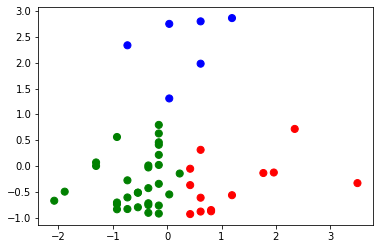

In [20]:
cores = np.array(['green', 'red', 'blue', 'yellow', 'black'])
plt.scatter(x=df_scale['Age'], 
            y=df_scale['Marketing'], 
            c=cores[df_scale.ypred], s=50)